In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('kin8nm')

In [3]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 2000, hidden_layers = [100, 100, 100], learning_rate = 0.006, exp_decay = .999)

initial loss:  7.2912068367004395
nllk loss:  tensor(0.6150, grad_fn=<MeanBackward0>) kernel loss: tensor(2.2254, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1991, grad_fn=<MeanBackward0>) kernel loss: tensor(16.1952, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.0542, grad_fn=<MeanBackward0>) kernel loss: tensor(73.1851, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.8139, grad_fn=<MeanBackward0>) kernel loss: tensor(76.1749, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.3491, grad_fn=<MeanBackward0>) kernel loss: tensor(35.3163, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.1500, grad_fn=<MeanBackward0>) kernel loss: tensor(29.0084, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.0385, grad_fn=<MeanBackward0>) kernel loss: tensor(40.5155, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.2763, grad_fn=<MeanBackward0>) kernel loss: tensor(23.6513, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.3084, grad_fn=<MeanBackward0>) kernel loss: tensor(24.2492, grad_fn=<AddBackward0>)
nllk loss:  tensor(

nllk loss:  tensor(-2.0155, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4779, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0330, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4985, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0197, grad_fn=<MeanBackward0>) kernel loss: tensor(2.6490, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.9740, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4051, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.9920, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3233, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.9916, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8142, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0490, grad_fn=<MeanBackward0>) kernel loss: tensor(2.0442, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0472, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9137, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0756, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1646, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0507, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-2.1522, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5370, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1771, grad_fn=<MeanBackward0>) kernel loss: tensor(1.5135, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1610, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7572, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1985, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8325, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1713, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6834, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1704, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7779, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1883, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4184, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1931, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1223, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1937, grad_fn=<MeanBackward0>) kernel loss: tensor(1.7019, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1987, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-2.2443, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6001, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.2135, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9793, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.2355, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5905, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.2952, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1433, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3200, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1909, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3343, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5764, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3196, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4255, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3323, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4053, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3215, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6219, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3255, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-2.3691, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4791, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3342, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6609, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3423, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7893, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3447, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3921, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3189, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5260, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.2952, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3408, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3671, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1987, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3637, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2822, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3779, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4875, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3967, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-2.4992, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2960, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.5309, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2645, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.4708, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6779, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.0215, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5598, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.2406, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9995, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.4865, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3842, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.4938, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5599, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.5110, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1248, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.5314, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7066, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.5157, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-2.5290, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8987, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.5606, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3181, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.5177, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4642, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.4928, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5168, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.5321, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4046, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.4920, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6752, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.4356, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5164, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.6359, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2002, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.6384, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3285, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.6203, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-2.7544, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6027, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8452, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1423, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8744, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4382, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9083, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6491, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8686, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3803, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8857, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3085, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8385, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2159, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8904, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2931, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7066, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5161, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3602, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.0068, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5603, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9607, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2285, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9991, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2297, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8582, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5070, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.1365, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2834, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.8125, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3552, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7026, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3826, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9856, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2448, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.0060, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2682, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.0478, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-2.8476, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1160, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8952, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2363, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1327, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2642, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1170, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2211, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.0708, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2679, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8154, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4937, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8470, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3759, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7455, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5963, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8587, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4405, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9121, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.3844, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6026, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4340, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3239, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4121, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2774, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4331, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2126, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4892, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3482, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4967, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2709, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5002, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4618, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4121, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2619, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2364, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1718, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.6580, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.4849, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2051, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5074, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1781, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4938, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2014, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5019, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2666, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4243, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1969, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.3291, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0541, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1219, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2944, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9285, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3386, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.4674, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0879, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7647, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.5649, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3403, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6088, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2180, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6278, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1095, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6225, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0937, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6245, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1632, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6102, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2442, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5726, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3280, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5198, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1920, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4544, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1030, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.3325, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.1779, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1424, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4114, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0984, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4246, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3670, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4587, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1730, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4208, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1355, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5889, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0929, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5676, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1898, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6211, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2359, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5350, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1971, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6239, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.6960, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1753, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7309, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3408, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7276, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1654, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7546, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2261, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7405, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2658, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7142, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1061, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7556, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0822, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7421, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3154, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7605, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0946, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7915, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.7080, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2647, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7865, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1313, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6533, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2784, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5769, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0959, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.3833, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1835, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4500, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1205, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2710, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1167, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.3733, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2068, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.3848, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2456, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6848, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.8760, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1267, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9145, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0237, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9362, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2054, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9627, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0538, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9696, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1913, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9472, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2188, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.8120, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3423, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6921, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1866, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4319, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2673, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2663, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.6422, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2559, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5818, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1806, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7918, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2567, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.8268, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2814, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9293, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1185, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9168, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1004, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.8864, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1273, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9119, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1188, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9626, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1835, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.8986, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.9779, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1856, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9567, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1314, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9190, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2707, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7363, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1138, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.8167, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1343, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7332, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1394, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7784, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0883, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7550, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1670, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7404, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1840, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.7049, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-4.0999, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1302, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0848, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3282, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1210, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1169, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1200, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2496, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0643, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1498, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0596, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2402, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0792, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1272, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.0085, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3302, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.8501, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1417, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6680, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-4.1591, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1503, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1176, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1602, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1403, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0661, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1334, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1052, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1764, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0934, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1806, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3145, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1835, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1058, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1852, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1166, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1945, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1436, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2024, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-4.0792, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0925, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1420, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1146, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1812, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0206, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2317, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0649, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2368, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1164, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2281, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2443, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2194, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1518, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2053, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2558, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2020, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1489, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2142, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.8855, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0282, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6517, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1470, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.6712, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2229, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5050, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3178, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.8813, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0701, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.9749, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1720, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1399, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0744, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1952, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1334, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2534, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1149, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2402, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-4.1700, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0944, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1979, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1020, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1507, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0830, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1841, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1837, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2089, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0579, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.2190, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0867, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1995, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2049, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1475, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1335, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1366, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0994, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.1822, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-4.3220, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0698, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3220, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4006, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3220, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1584, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3157, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0459, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3296, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1853, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3606, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0784, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3539, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1334, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3577, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2410, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3513, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2316, grad_fn=<AddBackward0>)
nllk loss:  tensor(-4.3641, grad_fn=<MeanBackward0>) ke

End2end test MAPE:  0.12442542
End2end test RMSE:  0.084976606
End2end test NLLK:  -3.991264
End2end test CRPS:  tensor(0.0465)


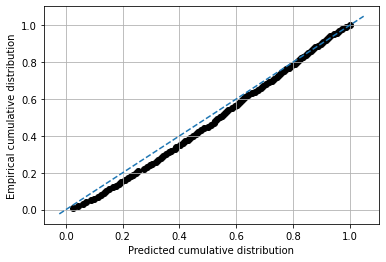

End2end test calibration error when step size is 0.001:  1.3030756025869281
End2end test calibration error when step size is 0.01:  0.13028471386946164
End2end test calibration error when step size is 0.1:  0.012192400074580745


In [4]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [5]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 10.60it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 10.66it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:01<00:00,  7.96it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.065
  RMSE          0.085
  MDAE          0.052
  MARPD         11.298
  R2            0.894
  Correlation   0.946
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.033
  Mean-absolute Calibration Error       0.031
  Miscalibration Area                   0.031
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.052
     Group Size: 0.56 -- Calibration Error: 0.040
     Group Size: 1.00 -- Calibration Error: 0.031
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.065
     Group Size: 0.56 -- Calibration Error: 0.043
     Group Size: 1.00 -- Calibration Error: 0.033
===============

Lims is None. Setting lims now:
min_max_true: (0.06322076, 1.4585207)
min_max_pred: (0.16693403, 1.4766705)
lims: (0.06322076, 1.4766705)
lims_ext: (-0.0781242147088051, 1.6180154800415039)


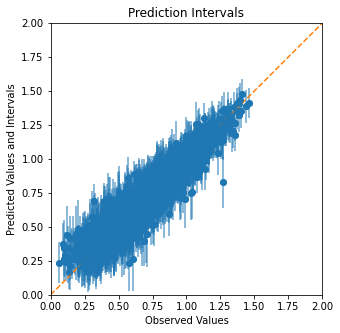

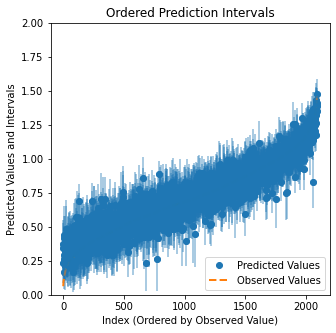

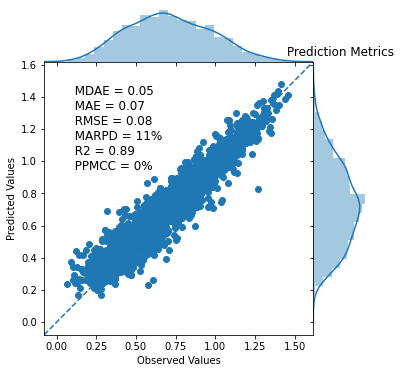

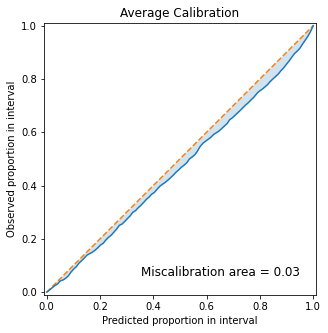

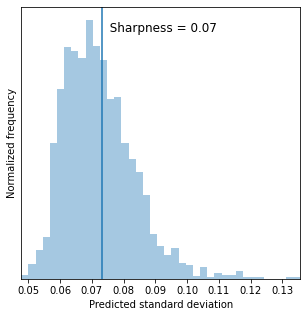

In [6]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))